# YouTube Video Engagement Rate Prediction
 This tool is designed to assist emerging YouTube content creators in optimizing their content strategy and enhancing audience engagement. The dataset utilized was created using the YouTube V3 API and consists of 1,998 rows of data from the most recent 200 videos of nine engineering educational channels. The data has been processed and organized into a Pandas DataFrame, which is used for exploratory data analysis (EDA). Subsequently, a machine learning algorithm is employed to predict the engagement rate of the videos.

### DataSet Creation Using Youtube V3 API
These IDs belong to original YouTube channels and are being used based on the conducted survey for educational purposes only.

### Channel IDs:
- WsCubeTech: UC0T6MVd3wQDB5ICAe45OxaQ
- Naresh IT: UC4o8Fdpv3g_AjgShAeivqpA
- nptelhrd: UC640y4UvDAlya_WOj5U4pfA
- campusX: UCCWi3hpnq_Pe03nGxuS7isg
- apna college: UCBwmMxybNva6P_5VmxjzwqA
- codewith harry: UCeVMnSShP_Iviwkknt83cww
- krish naik: UCNU_lfiiWBdtULKOw6X0Dig
- jennys lecture: UCM-yUTYGmrNvKOCcAl21g3w
- genie ashwani: UC-ZZjHr4nl5t32pFl3Sqf0A

import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('EDU_ytChannel_video_engagement_Stats (1).csv', index_col=0)
yt_data=data.copy()

## Data Exploration

In [7]:
yt_data.head()

,Channel_ID,Video_ID,Channel_Title,Video_Title,Description,Published_At,View_Count,Like_Count,Comment_Count,Subscriber_Count,Engagement_Rate
0,UC0T6MVd3wQDB5ICAe45OxaQ,QoGWVv15h8w,WsCube Tech,"Python Loops Tutorial: Learn For, While, and N...","Python Loops Tutorial: Learn For, While, and N...",2024-10-18T13:30:15Z,2442,130,13,3650000,0.003562
1,UC0T6MVd3wQDB5ICAe45OxaQ,7PBx9i_E6IA,WsCube Tech,How to Install & Complete Setup of Tailwind CS...,How to Install & Complete Setup of Tailwind CS...,2024-10-17T13:30:06Z,1760,67,10,3650000,0.001836
2,UC0T6MVd3wQDB5ICAe45OxaQ,jZ2Kv_ZZb4U,WsCube Tech,How to Research Your YouTube Competitors for V...,How to Research Your YouTube Competitors for V...,2024-10-16T15:03:11Z,4398,225,10,3650000,0.006164
3,UC0T6MVd3wQDB5ICAe45OxaQ,l150trEfhKo,WsCube Tech,What Is Tailwind CSS and Why Is It Important? ...,What Is Tailwind CSS and Why Is It Important? ...,2024-10-15T14:30:22Z,3094,124,6,3650000,0.003397
4,UC0T6MVd3wQDB5ICAe45OxaQ,gXQLBuhrlI0,WsCube Tech,PHP Crash Course For Beginners in 3 Hours | Le...,PHP Crash Course For Beginners in 3 Hours | Le...,2024-10-14T13:37:57Z,10146,377,24,3650000,0.010329


In [8]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1997
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel_ID        1998 non-null   object 
 1   Video_ID          1998 non-null   object 
 2   Channel_Title     1998 non-null   object 
 3   Video_Title       1998 non-null   object 
 4   Description       1871 non-null   object 
 5   Published_At      1998 non-null   object 
 6   View_Count        1998 non-null   int64  
 7   Like_Count        1998 non-null   int64  
 8   Comment_Count     1998 non-null   int64  
 9   Subscriber_Count  1998 non-null   int64  
 10  Engagement_Rate   1998 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 187.3+ KB


In [9]:
yt_data.describe()

,View_Count,Like_Count,Comment_Count,Subscriber_Count,Engagement_Rate
count,1.998000e+03,1998.000000,1998.000000,1.998000e+03,1998.000000
mean,1.279908e+05,6411.606607,213.486486,2.561667e+06,0.264236
std,4.783386e+05,24709.563679,722.370989,2.292204e+06,0.756349
min,0.000000e+00,0.000000,0.000000,1.070000e+05,0.000000
25%,3.672750e+03,120.000000,8.000000,1.050000e+06,0.006322
50%,1.624200e+04,537.500000,45.000000,1.740000e+06,0.046445
75%,5.645425e+04,1888.500000,144.250000,3.650000e+06,0.233159
max,8.995437e+06,519257.000000,18516.000000,6.780000e+06,14.251402


In [10]:
yt_data['Engagement_Rate'].describe()

count    1998.000000
mean        0.264236
std         0.756349
min         0.000000
25%         0.006322
50%         0.046445
75%         0.233159
max        14.251402
Name: Engagement_Rate, dtype: float64

In [11]:
print("Missing data percentage in features:")
yt_data.isnull().sum()/len(yt_data) * 100

Missing data percentage in features:


Channel_ID          0.000000
Video_ID            0.000000
Channel_Title       0.000000
Video_Title         0.000000
Description         6.356356
Published_At        0.000000
View_Count          0.000000
Like_Count          0.000000
Comment_Count       0.000000
Subscriber_Count    0.000000
Engagement_Rate     0.000000
dtype: float64

## Data Pre-Processing

In [12]:
yt_data.drop(['Channel_ID', 'Video_ID', 'Channel_Title'], axis=1, inplace=True)

In [13]:
yt_data.fillna(0, inplace=True) # as description attribute is important as well as text data.

In [14]:
print("Missing data percentage in features:")
yt_data.isnull().sum()/len(yt_data) * 100

Missing data percentage in features:


Video_Title         0.0
Description         0.0
Published_At        0.0
View_Count          0.0
Like_Count          0.0
Comment_Count       0.0
Subscriber_Count    0.0
Engagement_Rate     0.0
dtype: float64

In [15]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1997
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Video_Title       1998 non-null   object 
 1   Description       1998 non-null   object 
 2   Published_At      1998 non-null   object 
 3   View_Count        1998 non-null   int64  
 4   Like_Count        1998 non-null   int64  
 5   Comment_Count     1998 non-null   int64  
 6   Subscriber_Count  1998 non-null   int64  
 7   Engagement_Rate   1998 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 140.5+ KB


In [16]:
# Preprocess the text data
yt_data['text'] = yt_data['Video_Title'].fillna('').astype(str) + ' ' + yt_data['Description'].fillna('').astype(str)

In [17]:
yt_data['text'][250]

'Python Online Training | By Mr. Younus ✍️ Enroll Now: https://shorturl.at/3qNGI\n👉 Attend Free Demo On Python by Mr. Younus.\n📅 Demo on: 26th & 27th September @ 9:30 PM (IST).\n\nPython Online Training | By Mr. Younus\n\n** For Online Training Registration: https://goo.gl/r6kJbB  ► Call: +91-8179191999\n\nSubscribe to our channel and hit the bell 🔔🔔🔔 icon to get video updates. \n\n💡 Visit Our Websites   \n     For Classroom Training: https://nareshit.in\n     For Online Training: https://nareshit.com\n\n--------------------------\n\n💡 About NareshIT:\n\n"Naresh IT is having 20+ years of experience in software training industry and the best Software Training Institute for online training, classroom training, weekend training, corporate training of Data Science PYTHON,  AWS, DevOps, SalesForce, Java, Spring Boot, Micro Services, C#.NET, ASP.NET, Asp.Net MVC-6, Asp.Net MVC CORE, Oracle, SELENIUM, SQL Server, Selenium, Android, iPhone, C Language, C++, PHP, UNIX, LINUX and Digital Marketi

In [18]:
import re

# Preprocess the text data
def remove_urls(text):
    # Define a regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    # Remove URLs from the text using the pattern
    return url_pattern.sub(r'', text)

# Apply the remove_urls function to the 'text' column
yt_data['text'] = yt_data['text'].apply(remove_urls)

In [19]:
yt_data['text'][250]

'Python Online Training | By Mr. Younus ✍️ Enroll Now: \n👉 Attend Free Demo On Python by Mr. Younus.\n📅 Demo on: 26th & 27th September @ 9:30 PM (IST).\n\nPython Online Training | By Mr. Younus\n\n** For Online Training Registration:   ► Call: +91-8179191999\n\nSubscribe to our channel and hit the bell 🔔🔔🔔 icon to get video updates. \n\n💡 Visit Our Websites   \n     For Classroom Training: \n     For Online Training: \n\n--------------------------\n\n💡 About NareshIT:\n\n"Naresh IT is having 20+ years of experience in software training industry and the best Software Training Institute for online training, classroom training, weekend training, corporate training of Data Science PYTHON,  AWS, DevOps, SalesForce, Java, Spring Boot, Micro Services, C#.NET, ASP.NET, Asp.Net MVC-6, Asp.Net MVC CORE, Oracle, SELENIUM, SQL Server, Selenium, Android, iPhone, C Language, C++, PHP, UNIX, LINUX and Digital Marketing in USA, Hyderabad, Chennai and Vijayawada, Bangalore India which provides online t

In [20]:
yt_data['text'][400]

'Attend Demo on Multi Cloud | Mr. Santosh | NareshIT ✍️Enroll Now: \n👉Attend Free Demo on Multi Cloud [AWS + Azure] By Mr. Santosh\n📅 Demo on: 27th June 2024 @ 09:00 AM (IST).\n\nFor More Details:\n🌐Visit: \nCall: 040-2374 6666 | support@nareshit.com\n\n📩Join us on Telegram: \n📩Join us on WhatsApp: \n\n** For Online Training Registration:   ► Call: +91-8179191999\n\nSubscribe to our channel and hit the bell 🔔🔔🔔 icon to get video updates. \n\n💡 Visit Our Websites   \n     For Classroom Training: \n     For Online Training: \n\n--------------------------\n\n💡 About NareshIT:\n\n"Naresh IT is having 20+ years of experience in software training industry and the best Software Training Institute for online training, classroom training, weekend training, corporate training of Data Science PYTHON,  AWS, DevOps, SalesForce, Java, Spring Boot, Micro Services, C#.NET, ASP.NET, Asp.Net MVC-6, Asp.Net MVC CORE, Oracle, SELENIUM, SQL Server, Selenium, Android, iPhone, C Language, C++, PHP, UNIX, LIN

In [21]:
yt_data.drop(['Video_Title', 'Description'], axis=1, inplace=True)

In [22]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Published_At      1998 non-null   object 
 1   View_Count        1998 non-null   int64  
 2   Like_Count        1998 non-null   int64  
 3   Comment_Count     1998 non-null   int64  
 4   Subscriber_Count  1998 non-null   int64  
 5   Engagement_Rate   1998 non-null   float64
 6   text              1998 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 189.4+ KB


In [23]:
yt_data['Published_At'] = pd.to_datetime(yt_data['Published_At'])

In [24]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   Published_At      1998 non-null   datetime64[ns, UTC]
 1   View_Count        1998 non-null   int64              
 2   Like_Count        1998 non-null   int64              
 3   Comment_Count     1998 non-null   int64              
 4   Subscriber_Count  1998 non-null   int64              
 5   Engagement_Rate   1998 non-null   float64            
 6   text              1998 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(1)
memory usage: 189.4+ KB


In [25]:
yt_data['Day_of_Week'] = yt_data['Published_At'].dt.dayofweek

In [26]:
yt_data['Day_of_Week'].unique()

array([4, 3, 2, 1, 0, 6, 5], dtype=int32)

In [27]:
yt_data['Published_Month'] = yt_data['Published_At'].dt.month

In [28]:
yt_data['Published_Month'].unique()

array([10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 12, 11], dtype=int32)

In [29]:
yt_data.drop(['Published_At'], axis=1, inplace=True)

In [30]:
yt_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1997
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   View_Count        1998 non-null   int64  
 1   Like_Count        1998 non-null   int64  
 2   Comment_Count     1998 non-null   int64  
 3   Subscriber_Count  1998 non-null   int64  
 4   Engagement_Rate   1998 non-null   float64
 5   text              1998 non-null   object 
 6   Day_of_Week       1998 non-null   int32  
 7   Published_Month   1998 non-null   int32  
dtypes: float64(1), int32(2), int64(4), object(1)
memory usage: 189.4+ KB


In [31]:
yt_data.head(10)

,View_Count,Like_Count,Comment_Count,Subscriber_Count,Engagement_Rate,text,Day_of_Week,Published_Month
0,2442,130,13,3650000,0.003562,"Python Loops Tutorial: Learn For, While, and N...",4,10
1,1760,67,10,3650000,0.001836,How to Install & Complete Setup of Tailwind CS...,3,10
2,4398,225,10,3650000,0.006164,How to Research Your YouTube Competitors for V...,2,10
3,3094,124,6,3650000,0.003397,What Is Tailwind CSS and Why Is It Important? ...,1,10
4,10146,377,24,3650000,0.010329,PHP Crash Course For Beginners in 3 Hours | Le...,0,10
5,6581,250,20,3650000,0.006849,How to USE TubeBuddy & Grow Fast on YouTube (7...,4,10
6,3349,153,13,3650000,0.004192,"Python All Operators in One Video: Arithmetic,...",3,10
7,2710,109,19,3650000,0.002986,How to Install WordPress on Live Server in 5 M...,2,10
8,9230,371,50,3650000,0.010164,Avoid These 9 SEO Mistakes in 2025 (On-Page SE...,1,10
9,4234,139,18,3650000,0.003808,Data Analytics Mentorship Program with 100% Pl...,0,10


In [32]:
# yt_data.to_csv('pre_processed_EDU_ytChannel_video_engagement_Stats.csv')

## EDA

### Univariate Analysis - Histogram of numerical features

In [33]:
# Remove non-numerical columns
numerical_cols = yt_data.select_dtypes(include=['float64', 'int64']).columns
data_numerical = yt_data[numerical_cols]

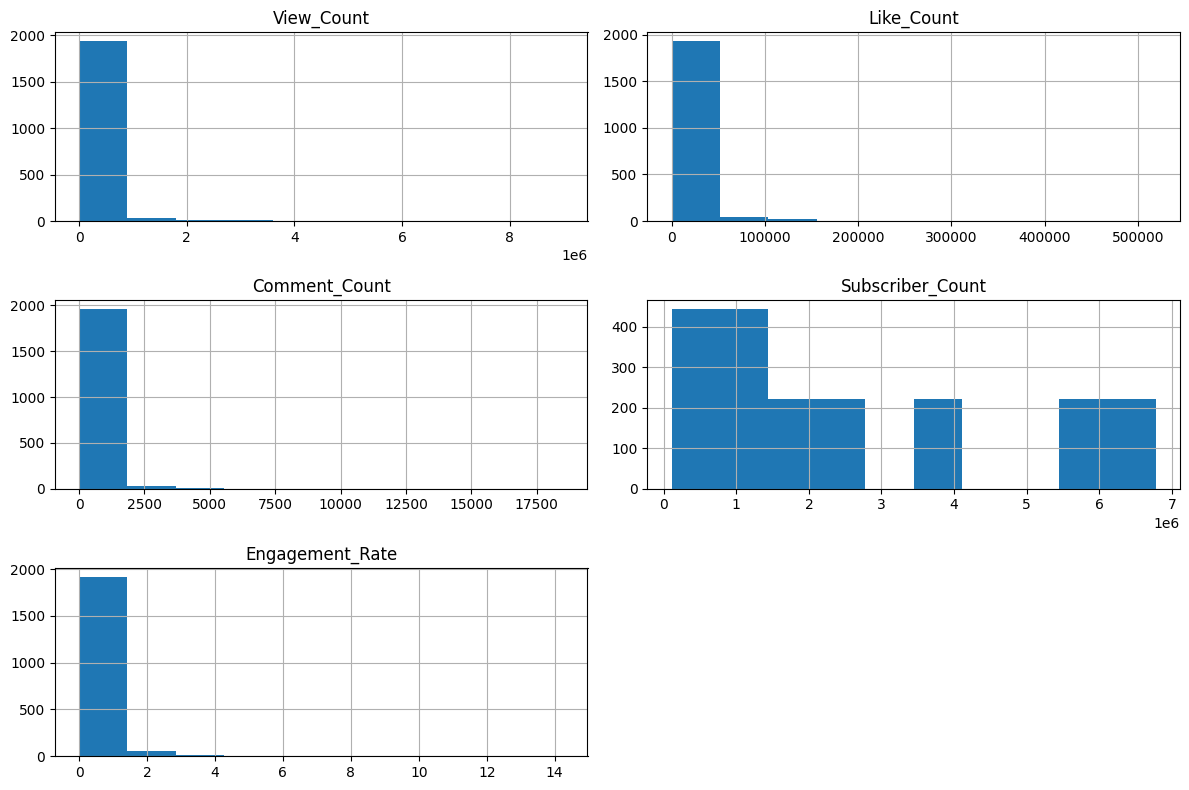

In [34]:
data_numerical.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

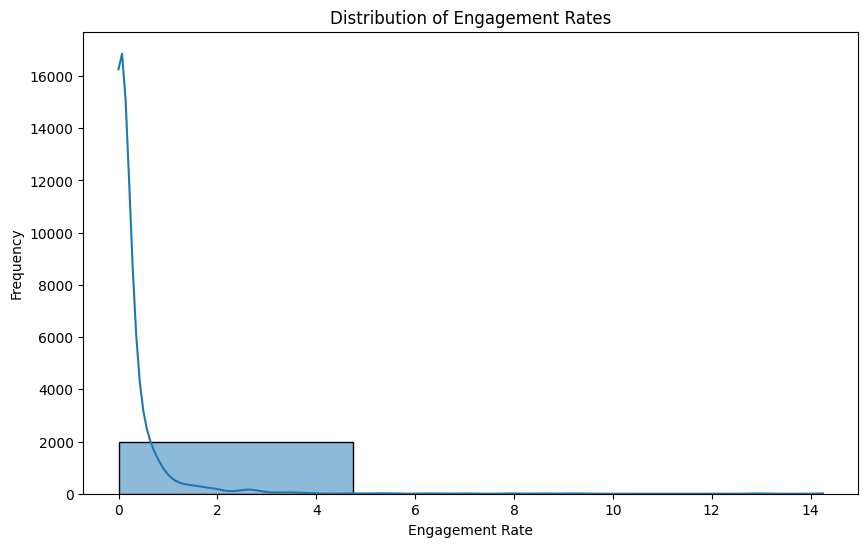

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(yt_data['Engagement_Rate'], bins=3, kde=True)
plt.title('Distribution of Engagement Rates')
plt.xlabel('Engagement Rate')
plt.ylabel('Frequency')
plt.show()

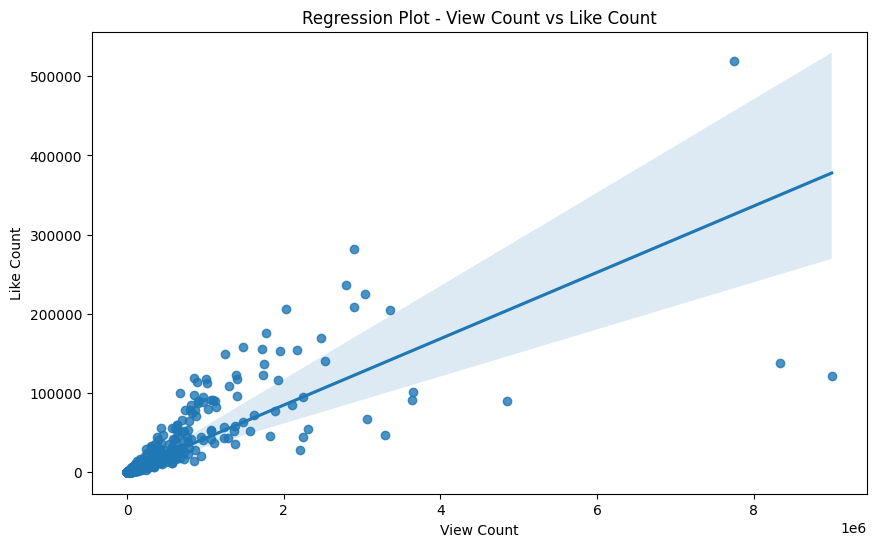

In [36]:
plt.figure(figsize=(10, 6))
sns.regplot(x='View_Count', y='Like_Count', data= yt_data)
plt.title('Regression Plot - View Count vs Like Count')
plt.xlabel('View Count')
plt.ylabel('Like Count')
plt.show()

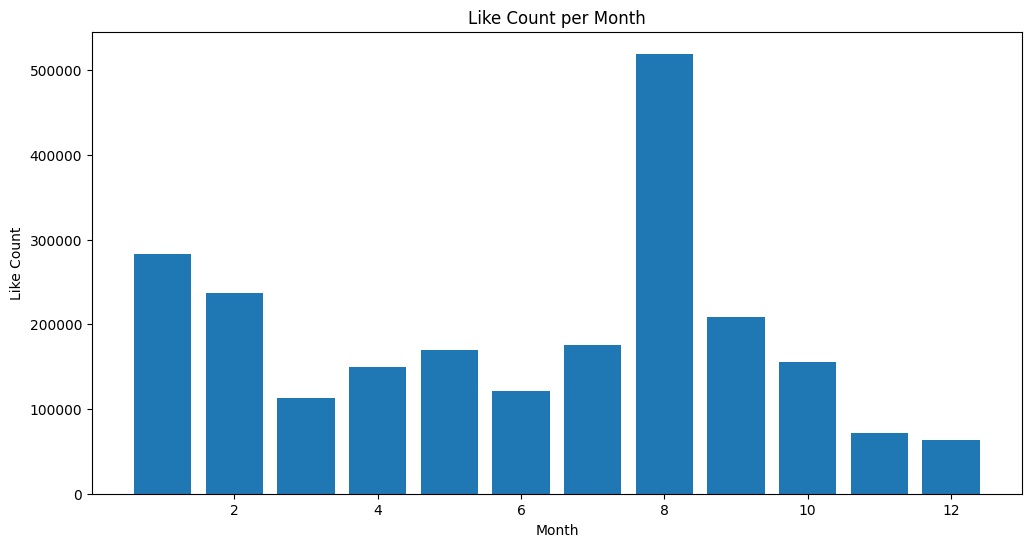

In [37]:
plt.figure(figsize=(12, 6))
plt.bar(yt_data['Published_Month'], yt_data['Like_Count'])
plt.title('Like Count per Month')
plt.xlabel('Month')
plt.ylabel('Like Count')
plt.show()

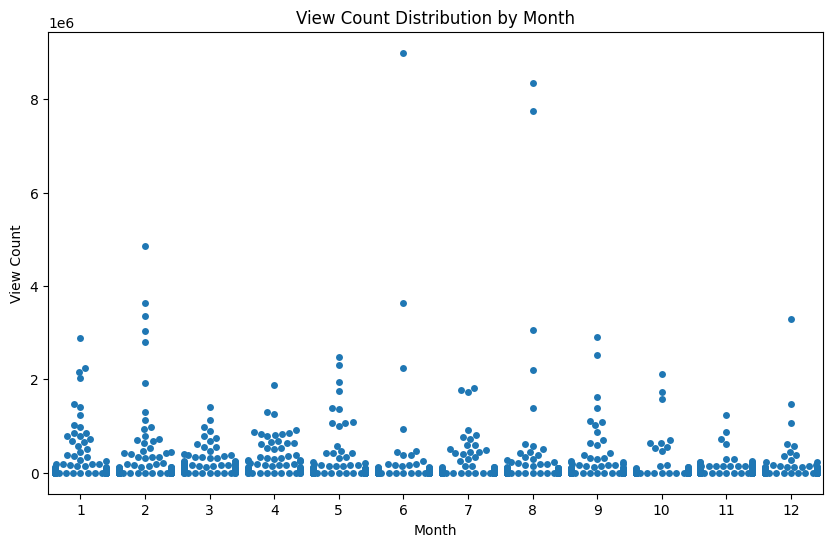

In [38]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Published_Month', y='View_Count', data=yt_data)
plt.title('View Count Distribution by Month')
plt.xlabel('Month')
plt.ylabel('View Count')
plt.show()

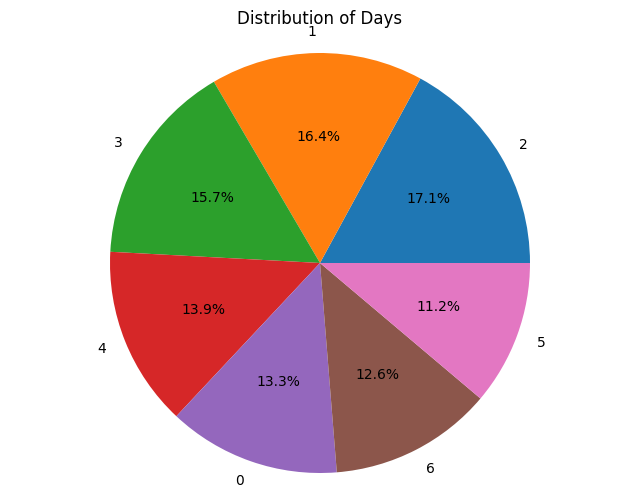

In [39]:
plt.figure(figsize=(8, 6))
day_counts = yt_data['Day_of_Week'].value_counts()
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Days')
plt.axis('equal')
plt.show()

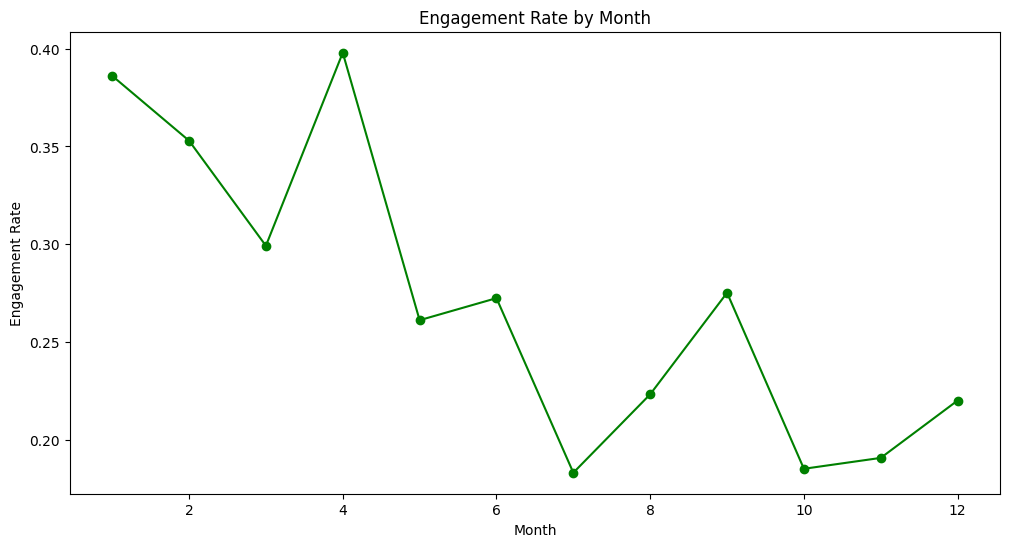

In [40]:
plt.figure(figsize=(12, 6))
engagement_by_month = yt_data.groupby('Published_Month')['Engagement_Rate'].mean()
engagement_by_month.plot(kind='line', marker='o', color='g')
plt.title('Engagement Rate by Month')
plt.xlabel('Month')
plt.ylabel('Engagement Rate')
plt.show()

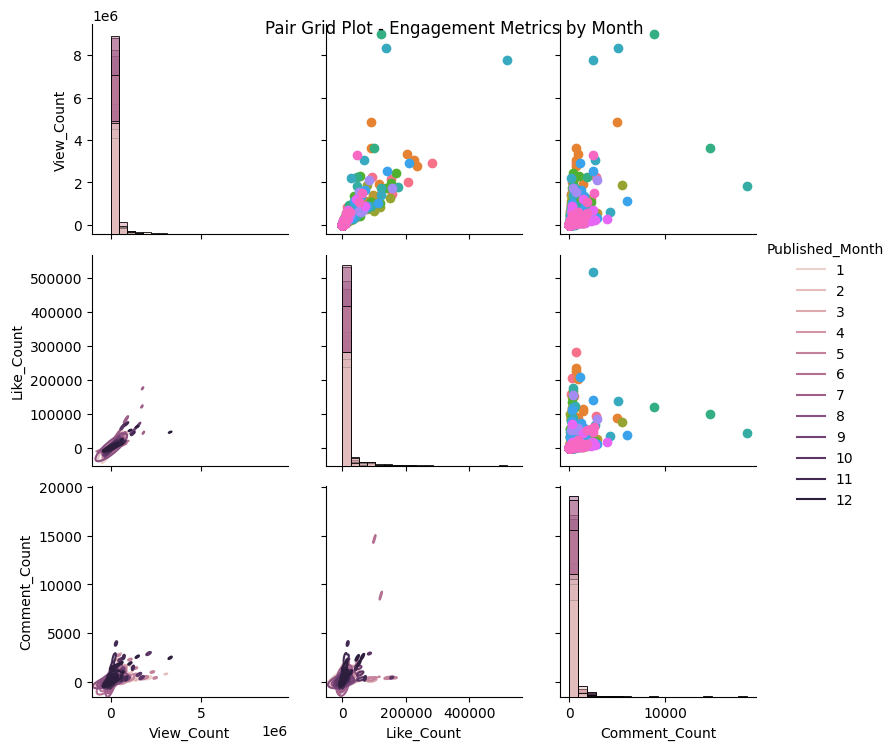

In [41]:
g = sns.PairGrid(yt_data, vars=['View_Count', 'Like_Count', 'Comment_Count'], hue='Published_Month')
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot, bins=20)
g.add_legend()
plt.suptitle('Pair Grid Plot - Engagement Metrics by Month')
plt.show()

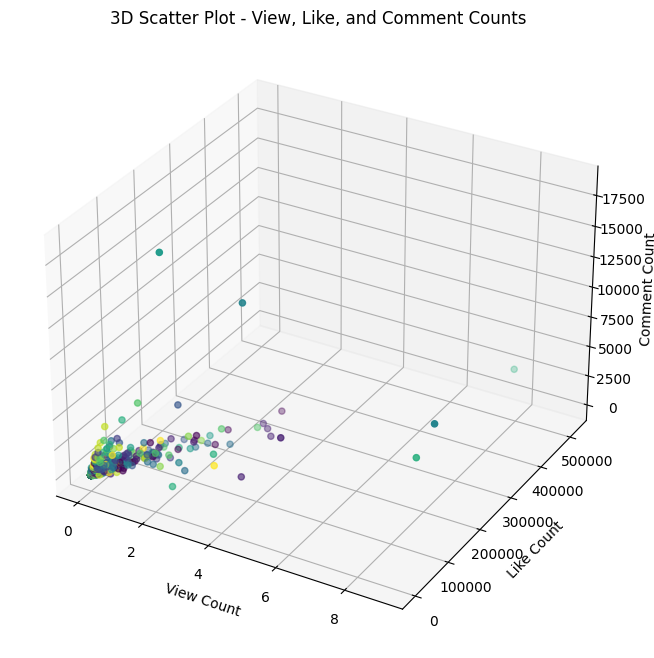

In [42]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(yt_data['View_Count'], yt_data['Like_Count'], yt_data['Comment_Count'], c=yt_data['Published_Month'])
ax.set_xlabel('View Count')
ax.set_ylabel('Like Count')
ax.set_zlabel('Comment Count')
plt.title('3D Scatter Plot - View, Like, and Comment Counts')
plt.show()

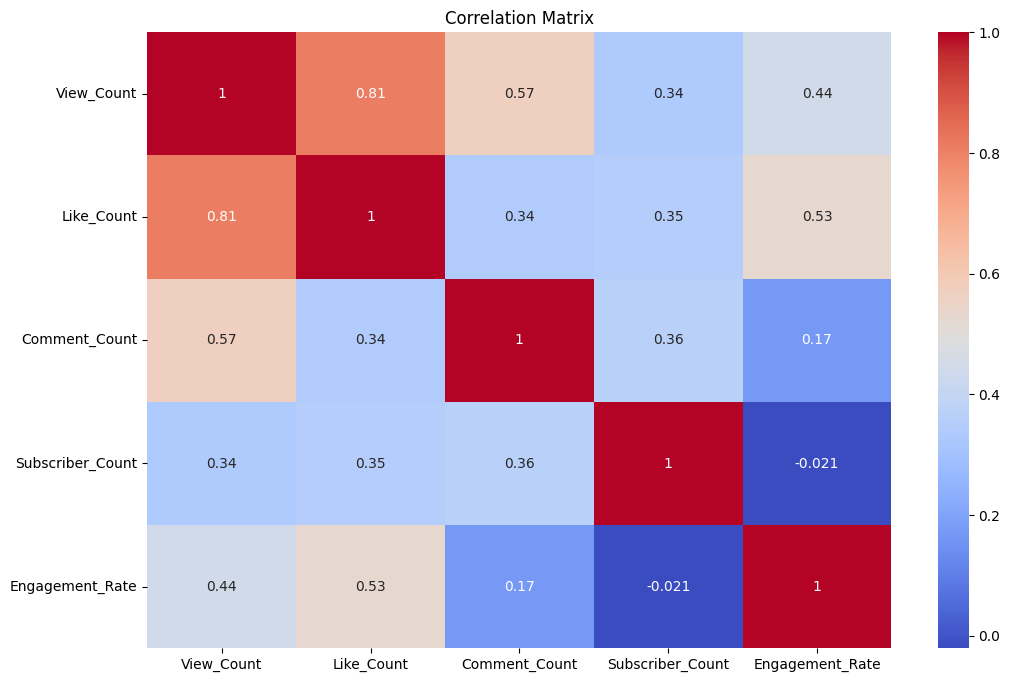

In [43]:
corr_matrix = data_numerical.corr();
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


## Model Building

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Split the data into features (X) and target variable (y)
X = yt_data.drop(['Engagement_Rate'], axis=1)
y = yt_data['Engagement_Rate']

In [46]:
X

,View_Count,Like_Count,Comment_Count,Subscriber_Count,text,Day_of_Week,Published_Month
0,2442,130,13,3650000,"Python Loops Tutorial: Learn For, While, and N...",4,10
1,1760,67,10,3650000,How to Install & Complete Setup of Tailwind CS...,3,10
2,4398,225,10,3650000,How to Research Your YouTube Competitors for V...,2,10
3,3094,124,6,3650000,What Is Tailwind CSS and Why Is It Important? ...,1,10
4,10146,377,24,3650000,PHP Crash Course For Beginners in 3 Hours | Le...,0,10
...,...,...,...,...,...,...,...
1993,3336,178,26,107000,The Emotional Damage of not being able to find...,5,5
1994,28010,837,39,107000,How To Clear TCS NQT In Just 10 Days | Get 19 ...,3,5
1995,7036,120,3,107000,Mastering MEAN as a BEGINNER Mastering MEAN ...,1,5
1996,20682,583,64,107000,JAVA With DSA PW Vs Apna College | Which Is B...,5,4


In [47]:
y

0       0.003562
1       0.001836
2       0.006164
3       0.003397
4       0.010329
          ...   
1993    0.166355
1994    0.782243
1995    0.112150
1996    0.544860
1997    0.330841
Name: Engagement_Rate, Length: 1998, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model 1: Linear Regression

In [49]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import linregress

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [51]:
# Define the preprocessing steps for text data
text_preprocessor = Pipeline([
    ('tfidf', TfidfVectorizer()),
])

# Define the column transformer to apply the appropriate preprocessing to each column
preprocessor = ColumnTransformer([
    ('text', text_preprocessor, 'text'),
])

In [52]:
# Combine the preprocessing steps with the model
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regression', LinearRegression())  
])

# Perform stratified k-fold cross-validation
kfolds = 5
kf = KFold(n_splits=kfolds, shuffle=True, random_state=42)

r_squared_list = []
adjusted_r_squared_list = []
mae_list = []
mad_list = []

best_fold = None
best_mae = float('inf')

for fold, (train_index, val_index) in enumerate(kf.split(X_train)):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    model.fit(X_train_fold, y_train_fold)

    r_squared = model.score(X_train_fold, y_train_fold)
    n = len(X_train_fold)
    p = X_train_fold.shape[1]
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    r_squared_list.append(round(r_squared, 4))
    adjusted_r_squared_list.append(round(adjusted_r_squared, 4))

    y_pred_val = model.predict(X_val_fold)

    mae_val = mean_absolute_error(y_val_fold, y_pred_val)
    mae_list.append(round(mae_val, 4))

    mad_val = np.mean(np.abs(y_val_fold - y_pred_val))
    mad_list.append(round(mad_val, 4))

    print(f"Fold {fold + 1}:")
    print("R-Squared:", round(r_squared, 4))
    print("Adjusted R-Squared:", round(adjusted_r_squared, 4))
    print("Mean Absolute Error:", round(mae_val, 4))
    print("Mean Absolute Deviation:", round(mad_val, 4))
    print("----------------------------------")
    
    if mae_val < best_mae:
        best_mae = mae_val
        best_fold = (X_train_fold, y_train_fold, X_val_fold, y_val_fold, model)

avg_r_squared = np.mean(r_squared_list)
avg_adjusted_r_squared = np.mean(adjusted_r_squared_list)
avg_mae = np.mean(mae_list)
avg_mad = np.mean(mad_list)

print("Average R-Squared across all folds:", round(avg_r_squared, 5))
print("Average Adjusted R-Squared across all folds:", round(avg_adjusted_r_squared, 5))
print("Average Mean Absolute Error across all folds:", round(avg_mae, 5))
print("Average Mean Absolute Deviation across all folds:", round(avg_mad, 5))

Fold 1:
R-Squared: 1.0
Adjusted R-Squared: 1.0
Mean Absolute Error: 1.1328
Mean Absolute Deviation: 1.1328
----------------------------------
Fold 2:
R-Squared: 1.0
Adjusted R-Squared: 1.0
Mean Absolute Error: 1.1914
Mean Absolute Deviation: 1.1914
----------------------------------
Fold 3:
R-Squared: 1.0
Adjusted R-Squared: 1.0
Mean Absolute Error: 0.9103
Mean Absolute Deviation: 0.9103
----------------------------------
Fold 4:
R-Squared: 1.0
Adjusted R-Squared: 1.0
Mean Absolute Error: 1.3203
Mean Absolute Deviation: 1.3203
----------------------------------
Fold 5:
R-Squared: 1.0
Adjusted R-Squared: 1.0
Mean Absolute Error: 1.2991
Mean Absolute Deviation: 1.2991
----------------------------------
Average R-Squared across all folds: 1.0
Average Adjusted R-Squared across all folds: 1.0
Average Mean Absolute Error across all folds: 1.17078
Average Mean Absolute Deviation across all folds: 1.17078


In [53]:
X_train_best, y_train_best, X_val_best, y_val_best, best_model = best_fold

test_r_square = best_model.score(X_train_best, y_train_best)
n = len(X_train_best)
p = X_train_best.shape[1]
test_adjusted_r_square = 1 - (1 - test_r_square) * (n - 1) / (n - p - 1)

y_pred_test = best_model.predict(X_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mad_test = np.mean(np.abs(y_test - y_pred_test))

print("R-Squared for test data:", round(test_r_square, 4))
print("Adjusted R-Squared for test data:", round(test_adjusted_r_square, 4))
print("Mean Absolute Error for test data:", round(mae_test, 4))
print("Mean Absolute Deviation for test data:", round(mad_test, 4))

R-Squared for test data: -1.0641
Adjusted R-Squared for test data: -1.0755
Mean Absolute Error for test data: 1.4554
Mean Absolute Deviation for test data: 1.4554


In [54]:
# Retrieve the linear regression model from the pipeline
linear_regression_model = best_model.named_steps['regression']

# Retrieve the coefficients
coefficients = linear_regression_model.coef_
intercept = linear_regression_model.intercept_

feature_names = X_train.columns
rounded_coefficients = [round(coefficient, 2) for coefficient in coefficients]

# Print the equation of the best fitted line
print("Fitted line: y =", end=" ")
for feature, coefficient in zip(feature_names, rounded_coefficients):
    print(f"({coefficient} * {feature}) +", end=" ")
print(intercept)

Fitted line: y = (-0.51 * View_Count) + (-2.22 * Like_Count) + (0.21 * Comment_Count) + (-0.09 * Subscriber_Count) + (-0.95 * text) + (-0.39 * Day_of_Week) + (-0.02 * Published_Month) + 0.25607574275858014


## Predicitng Engagement Rate on Best Model Build Using Logistic Regression

In [55]:
planned_topic = input("Enter the Topic: ")
planned_description = input("Enter the Description: ")
planned_text = planned_topic + ' ' + planned_description

#other user inputs
View_Count = float(input("Enter the Anticipated View Count: "))
Like_Count = float(input("Enter the Anticipated Like Count: "))
Comment_Count = float(input("Enter the Anticipated Comment Count: "))
Subscriber_Count = float(input("Enter the Subscriber Count: "))
Day_of_Week = int(input("Enter the Day of the Week planned to publish (1-7): "))
Published_Month = int(input("Enter the Published Month planned to publish (1-12): "))

# Create a DataFrame with user input
planned_data = pd.DataFrame({
    'View_Count': [View_Count],
    'Like_Count': [Like_Count],
    'Comment_Count': [Comment_Count],
    'Subscriber_Count': [Subscriber_Count],
    'Day_of_Week': [Day_of_Week],
    'Published_Month': [Published_Month],
    'text': [planned_text]
})

Enter the Topic:  Learn DSA hero to Zero | in one shots | 2024 | PLacement Prep Training 
Enter the Description:  Master and join our course . CPP  Fundamentals. 
Enter the Anticipated View Count:  200
Enter the Anticipated Like Count:  50
Enter the Anticipated Comment Count:  50
Enter the Subscriber Count:  100
Enter the Day of the Week planned to publish (1-7):  6
Enter the Published Month planned to publish (1-12):  2


In [56]:
# Use the best_model to predict the engagement rate
predicted_engagement_rate = best_model.predict(planned_data)

print("Predicted Engagement Rate:", predicted_engagement_rate)

Predicted Engagement Rate: [-1.76912587]


In [57]:
# Calculate the percentile
engagement_rates_sorted = np.sort(yt_data['Engagement_Rate'])
position = np.searchsorted(engagement_rates_sorted, predicted_engagement_rate)
percentile = ((position + 0.5) / len(engagement_rates_sorted)) * 100

print("Predicted Engagement Percentile:", percentile)

Predicted Engagement Percentile: [0.02502503]


### The output indicates that, based on the input, the model predicted a very low engagement rate, implying that it does not recommend proceeding. However, the limitation here is that we anticipated these statistics. Therefore, let's develop another model to address this issue.

## Model 2 & 3: Decision Tree, Random Forest Classification

In [59]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [60]:
yt_data_2 = yt_data.copy()

threshold = yt_data_2['Engagement_Rate'].median()

# Categorize the 'Engagement_Rate' column based on the threshold where 1 == good, 0 == bad
yt_data_2['Engagement_Category'] = yt_data_2['Engagement_Rate'].apply(lambda x: 1 if x >= threshold else 0)

In [61]:
yt_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1998 entries, 0 to 1997
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   View_Count           1998 non-null   int64  
 1   Like_Count           1998 non-null   int64  
 2   Comment_Count        1998 non-null   int64  
 3   Subscriber_Count     1998 non-null   int64  
 4   Engagement_Rate      1998 non-null   float64
 5   text                 1998 non-null   object 
 6   Day_of_Week          1998 non-null   int32  
 7   Published_Month      1998 non-null   int32  
 8   Engagement_Category  1998 non-null   int64  
dtypes: float64(1), int32(2), int64(5), object(1)
memory usage: 205.0+ KB


In [62]:
# Split the data into features (X) and target variable (y)
X2 = yt_data_2.drop(['Engagement_Category', 'Engagement_Rate'], axis=1)
y2 = yt_data_2['Engagement_Category']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [64]:
# Define the preprocessing steps for text data
text_preprocessor = Pipeline([
    ('tfidf', TfidfVectorizer()),
])

# Define the column transformer to apply the appropriate preprocessing to each column
preprocessor = ColumnTransformer([
    ('text', text_preprocessor, 'text'),
])

In [65]:
results = []
n_trees = [50, 100, 200]
criteria = ['gini', 'entropy']

mean_fpr = np.linspace(0, 1, 100)
dt_tprs, rf_tprs = [], []

rf_feature_importances = []

In [66]:
for n_tree in n_trees:
    for criterion in criteria:
        
        # Decision Tree Classification
        dt_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', DecisionTreeClassifier(criterion=criterion, random_state=42))
        ])
        dt_pipeline.fit(X_train, y_train)

        # Random Forest Classification
        rf_pipeline = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', RandomForestClassifier(n_estimators=n_tree, criterion=criterion, random_state=42))
        ])
        rf_pipeline.fit(X_train, y_train)
        
        # Eval Decision Tree
        dt_y_pred = dt_pipeline.predict(X_test)
        dt_accuracy = accuracy_score(y_test, dt_y_pred)
        dt_roc_auc = roc_auc_score(y_test, dt_pipeline.predict_proba(X_test)[:, 1])
        dt_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
        
        dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_pipeline.predict_proba(X_test)[:, 1])
        dt_tprs.append(np.interp(mean_fpr, dt_fpr, dt_tpr))

        # Eval Random Forest
        rf_y_pred = rf_pipeline.predict(X_test)
        rf_accuracy = accuracy_score(y_test, rf_y_pred)
        rf_roc_auc = roc_auc_score(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
        rf_confusion_matrix = confusion_matrix(y_test, rf_y_pred)

        rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_pipeline.predict_proba(X_test)[:, 1])
        rf_tprs.append(np.interp(mean_fpr, rf_fpr, rf_tpr))

        # Storing data
        results.append({
            "Number of trees": n_tree,
            "Criterion": criterion,
            "Decision Tree Accuracy": dt_accuracy,
            "Decision Tree ROC AUC": dt_roc_auc,
            "Decision Tree Confusion Matrix": dt_confusion_matrix,
            "Random Forest Accuracy": rf_accuracy,
            "Random Forest ROC AUC": rf_roc_auc,
            "Random Forest Confusion Matrix": rf_confusion_matrix,
            "Decision Tree Model": dt_pipeline,
            "Random Forest Model": rf_pipeline
        })

In [67]:
results_df = pd.DataFrame(results)
print(results_df)

   Number of trees Criterion  Decision Tree Accuracy  Decision Tree ROC AUC  \
0               50      gini                   0.835               0.837059   
1               50   entropy                   0.850               0.852248   
2              100      gini                   0.835               0.837059   
3              100   entropy                   0.850               0.852248   
4              200      gini                   0.835               0.837059   
5              200   entropy                   0.850               0.852248   

  Decision Tree Confusion Matrix  Random Forest Accuracy  \
0         [[170, 32], [34, 164]]                  0.8750   
1         [[169, 33], [27, 171]]                  0.8725   
2         [[170, 32], [34, 164]]                  0.8800   
3         [[169, 33], [27, 171]]                  0.8675   
4         [[170, 32], [34, 164]]                  0.8800   
5         [[169, 33], [27, 171]]                  0.8725   

   Random Forest ROC AUC 

In [68]:
# Find the best hyperparameter combination

best_result = results_df.loc[results_df['Random Forest ROC AUC'].idxmax()]
print("\nBest Hyperparameter Combination:")
print(best_result)


Best Hyperparameter Combination:
Number of trees                                                                  50
Criterion                                                                   entropy
Decision Tree Accuracy                                                         0.85
Decision Tree ROC AUC                                                      0.852248
Decision Tree Confusion Matrix                               [[169, 33], [27, 171]]
Random Forest Accuracy                                                       0.8725
Random Forest ROC AUC                                                      0.954908
Random Forest Confusion Matrix                               [[170, 32], [19, 179]]
Decision Tree Model               (ColumnTransformer(transformers=[('text',\n   ...
Random Forest Model               (ColumnTransformer(transformers=[('text',\n   ...
Name: 1, dtype: object


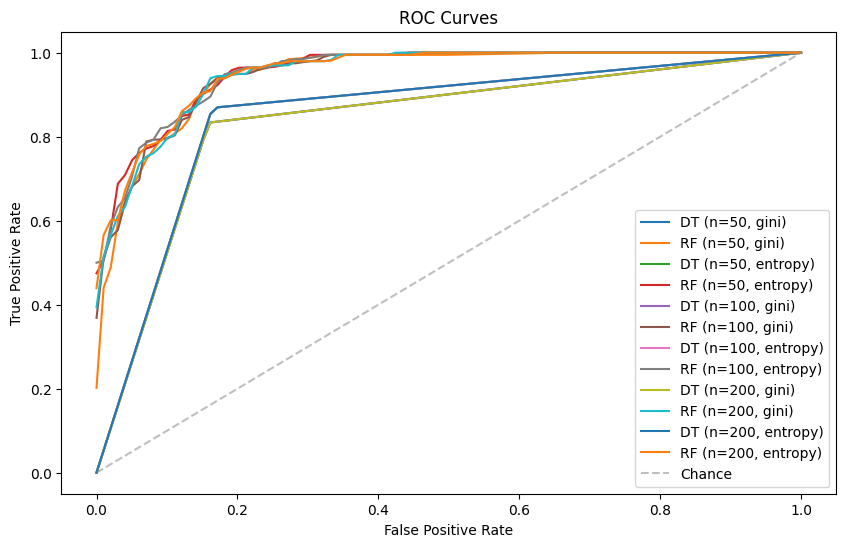

In [70]:
from itertools import product

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i, (n_tree, criterion) in enumerate(product(n_trees, criteria), 1):
    plt.plot(mean_fpr, dt_tprs[i-1], label=f'DT (n={n_tree}, {criterion})')
    plt.plot(mean_fpr, rf_tprs[i-1], label=f'RF (n={n_tree}, {criterion})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Chance', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

## Plotting DT and RFT Without Text Column

In [71]:
yt_data_3 = yt_data_2.copy()
yt_data_3 = yt_data_3.drop(['text'], axis=1)

In [72]:
yt_data_3

,View_Count,Like_Count,Comment_Count,Subscriber_Count,Engagement_Rate,Day_of_Week,Published_Month,Engagement_Category
0,2442,130,13,3650000,0.003562,4,10,0
1,1760,67,10,3650000,0.001836,3,10,0
2,4398,225,10,3650000,0.006164,2,10,0
3,3094,124,6,3650000,0.003397,1,10,0
4,10146,377,24,3650000,0.010329,0,10,0
...,...,...,...,...,...,...,...,...
1993,3336,178,26,107000,0.166355,5,5,1
1994,28010,837,39,107000,0.782243,3,5,1
1995,7036,120,3,107000,0.112150,1,5,1
1996,20682,583,64,107000,0.544860,5,4,1


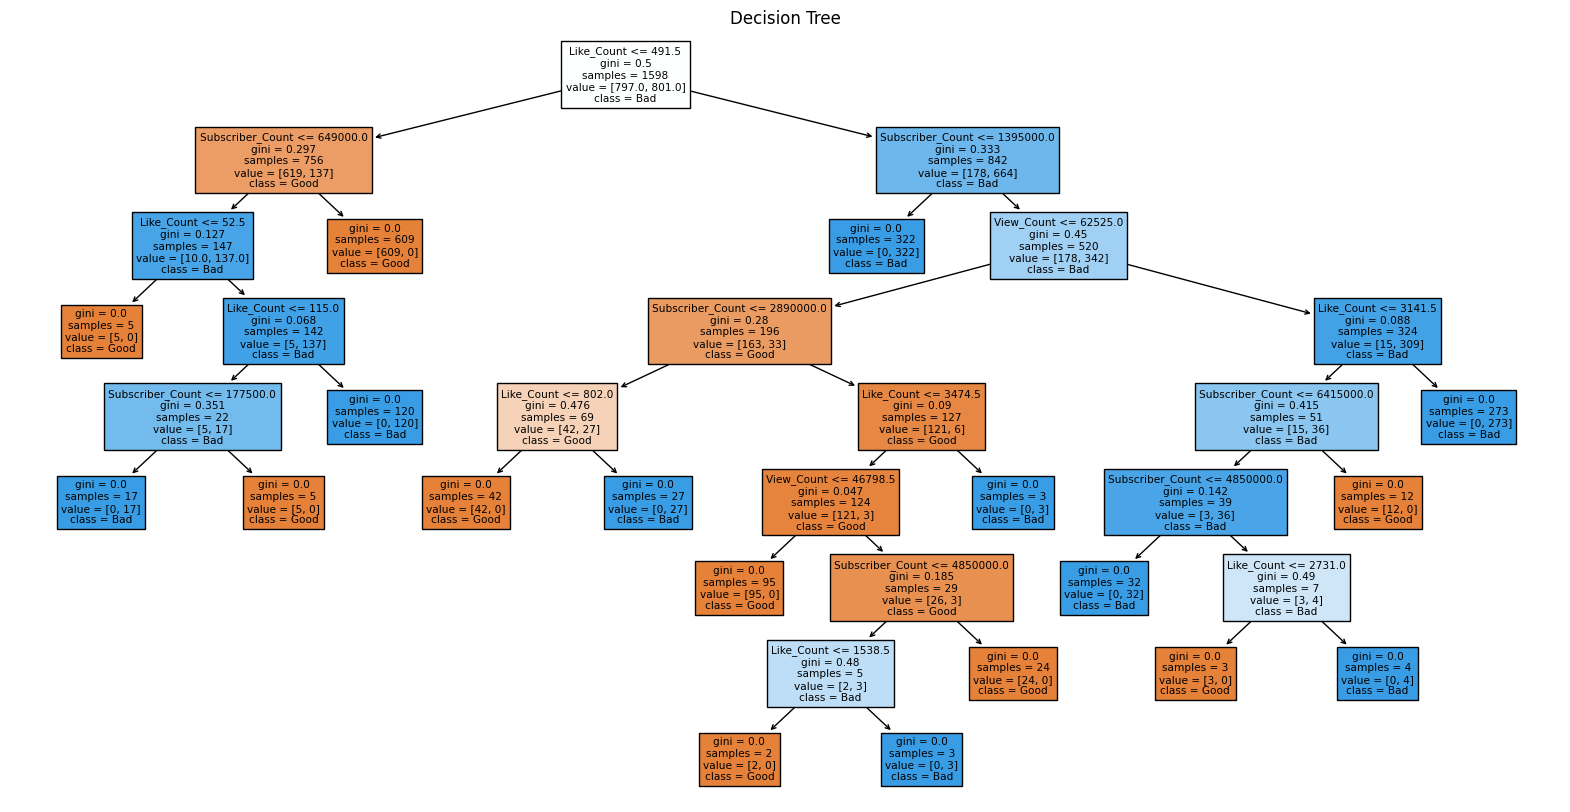

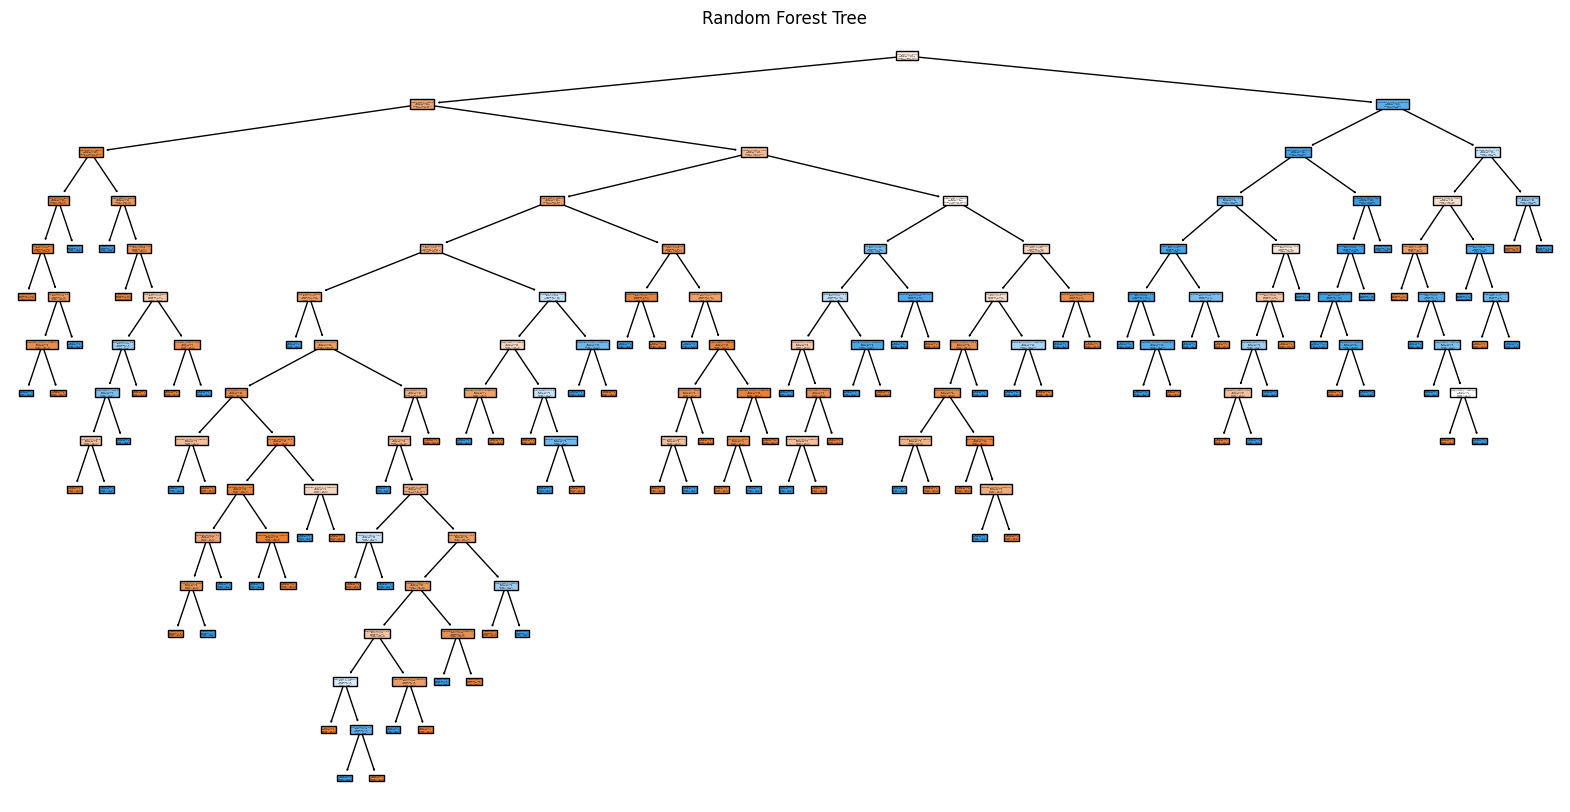

In [73]:
X3 = yt_data_3.drop(['Engagement_Category', 'Engagement_Rate'], axis=1)
y3 = yt_data_3['Engagement_Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

# Fit a decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_classifier, filled=True, feature_names=X3.columns, class_names=['Good', 'Bad'])
plt.title("Decision Tree")
plt.show()

# Fit a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Plot one of the trees from the random forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=X3.columns, class_names=['Good', 'Bad'])
plt.title("Random Forest Tree")
plt.show()

In [74]:
from sklearn.metrics import classification_report

# Predictions for decision tree classifier
dt_y_pred = dt_classifier.predict(X_test)

# Print performance report for decision tree
print("Decision Tree Classifier Performance Report:")
print(classification_report(y_test, dt_y_pred))

# Predictions for random forest classifier
rf_y_pred = rf_classifier.predict(X_test)

# Print performance report for random forest
print("Random Forest Classifier Performance Report:")
print(classification_report(y_test, rf_y_pred))

Decision Tree Classifier Performance Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       0.99      1.00      1.00       198

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400

Random Forest Classifier Performance Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       202
           1       0.99      1.00      0.99       198

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



## K-Means

In [75]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [81]:

titles = data['Video_Title'].fillna('')  
descriptions = data['Description'].fillna('')  
subscribers = data['Subscriber_Count'].fillna(0)

In [82]:
tfidf_title_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf_description_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)

tfidf_title_matrix = tfidf_title_vectorizer.fit_transform(titles)
tfidf_description_matrix = tfidf_description_vectorizer.fit_transform(descriptions)

In [83]:
scaler = StandardScaler()
scaled_subscribers = scaler.fit_transform(subscribers.values.reshape(-1, 1))

In [84]:
combined_features = np.hstack([tfidf_title_matrix.toarray(), tfidf_description_matrix.toarray(), scaled_subscribers])

In [85]:
# Define a function to calculate metrics for different values of K

def evaluate_k_values(combined_features, k_range):
    results = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(combined_features)
        labels = kmeans.labels_
        
        # Silhouette score
        silhouette_avg = silhouette_score(combined_features, labels)

        # Davies-Bouldin score
        davies_bouldin_avg = davies_bouldin_score(combined_features, labels)
        
        # Inertia
        inertia = kmeans.inertia_

        results.append({
            'k': k,
            'silhouette_score': silhouette_avg,
            'davies_bouldin_score': davies_bouldin_avg,
            'inertia': inertia
        })
    
    return results

In [86]:
# Test multiple K values
k_range = range(2, 11)  # Testing for k values between 2 and 10
results = evaluate_k_values(combined_features, k_range)

In [87]:
for result in results:
    print(f"K: {result['k']}, Silhouette Score: {result['silhouette_score']:.3f}, Davies-Bouldin Score: {result['davies_bouldin_score']:.3f}, Inertia: {result['inertia']:.3f}")

K: 2, Silhouette Score: 0.286, Davies-Bouldin Score: 1.404, Inertia: 3776.965
K: 3, Silhouette Score: 0.142, Davies-Bouldin Score: 2.403, Inertia: 3483.217
K: 4, Silhouette Score: 0.123, Davies-Bouldin Score: 2.534, Inertia: 3276.860
K: 5, Silhouette Score: 0.119, Davies-Bouldin Score: 2.460, Inertia: 3200.446
K: 6, Silhouette Score: 0.131, Davies-Bouldin Score: 2.482, Inertia: 3066.093
K: 7, Silhouette Score: 0.123, Davies-Bouldin Score: 2.484, Inertia: 2939.992
K: 8, Silhouette Score: 0.132, Davies-Bouldin Score: 2.521, Inertia: 2913.098
K: 9, Silhouette Score: 0.113, Davies-Bouldin Score: 2.994, Inertia: 2898.590
K: 10, Silhouette Score: 0.129, Davies-Bouldin Score: 2.745, Inertia: 2755.229


In [88]:
optimal_k_silhouette = max(results, key=lambda x: x['silhouette_score'])
optimal_k_davies_bouldin = min(results, key=lambda x: x['davies_bouldin_score'])
optimal_k_inertia = max(results, key=lambda x: x['inertia'])

In [89]:
# Print the optimal K values based on the criteria
print("\nOptimal K Values Based on Different Criteria:")
print(f"Highest Silhouette Score: K = {optimal_k_silhouette['k']}, Score = {optimal_k_silhouette['silhouette_score']:.3f}")
print(f"Lowest Davies-Bouldin Score: K = {optimal_k_davies_bouldin['k']}, Score = {optimal_k_davies_bouldin['davies_bouldin_score']:.3f}")
print(f"Highest Inertia: K = {optimal_k_inertia['k']}, Inertia = {optimal_k_inertia['inertia']:.3f}")


Optimal K Values Based on Different Criteria:
Highest Silhouette Score: K = 2, Score = 0.286
Lowest Davies-Bouldin Score: K = 2, Score = 1.404
Highest Inertia: K = 2, Inertia = 3776.965


In [90]:
# Apply KMeans with the optimal number of clusters
optimal_k = optimal_k_inertia['k']  # You can choose any optimal K from the previous step
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(combined_features)

KMeans(n_clusters=2, random_state=42)

In [91]:
cluster_labels = kmeans.labels_
data['cluster'] = cluster_labels
print(data[['Video_Title', 'Description', 'Subscriber_Count', 'cluster']].head())

                                         Video_Title  \
0  Python Loops Tutorial: Learn For, While, and N...   
1  How to Install & Complete Setup of Tailwind CS...   
2  How to Research Your YouTube Competitors for V...   
3  What Is Tailwind CSS and Why Is It Important? ...   
4  PHP Crash Course For Beginners in 3 Hours | Le...   

                                         Description  Subscriber_Count  \
0  Python Loops Tutorial: Learn For, While, and N...           3650000   
1  How to Install & Complete Setup of Tailwind CS...           3650000   
2  How to Research Your YouTube Competitors for V...           3650000   
3  What Is Tailwind CSS and Why Is It Important? ...           3650000   
4  PHP Crash Course For Beginners in 3 Hours | Le...           3650000   

   cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


### New User Input for Video Prediction
In this step, we input details of a new video—its title, description, and subscriber count—to predict which cluster it belongs to using the existing clustering model.

In [92]:
new_title = ["How to master Python in 30 days"]
new_description = ["A complete tutorial for beginners."]
new_subscribers = [10000]

In [93]:
# Vectorize the new title and description
new_title_tfidf = tfidf_title_vectorizer.transform(new_title)
new_description_tfidf = tfidf_description_vectorizer.transform(new_description)

In [94]:
# Scale the new number of subscribers
new_subscribers_scaled = scaler.transform(np.array(new_subscribers).reshape(-1, 1))

In [95]:
# Combine the features for the new video
new_combined_features = np.hstack([new_title_tfidf.toarray(), new_description_tfidf.toarray(), new_subscribers_scaled])

In [96]:
# Predict the cluster for the new video
predicted_cluster = kmeans.predict(new_combined_features)
print(f"The new video belongs to Cluster: {predicted_cluster[0]}")

The new video belongs to Cluster: 0


## Visualize clusters using PCA (dimensionality reduction)



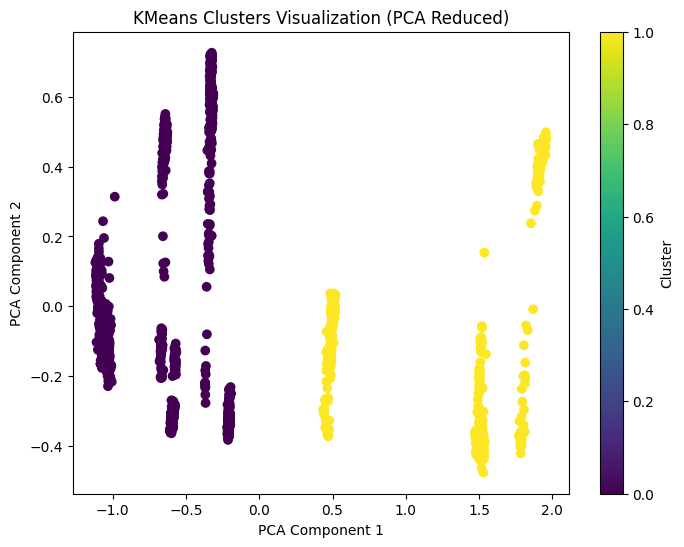

In [97]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(combined_features)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', marker='o')
plt.colorbar(label="Cluster")
plt.title('KMeans Clusters Visualization (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

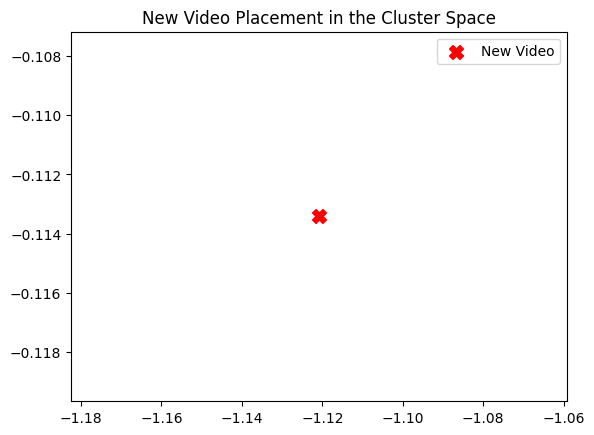

In [98]:
# Visualize where the new video might fall in the PCA space
new_video_reduced = pca.transform(new_combined_features)
plt.scatter(new_video_reduced[:, 0], new_video_reduced[:, 1], color='red', label='New Video', s=100, marker='X')
plt.legend()
plt.title('New Video Placement in the Cluster Space')
plt.show()

### Interpretation of Clusters with meaningful output



In [99]:
def interpret_cluster(cluster_number, centroids, data, tfidf_vectorizer):
    centroids_scaled_back = np.hstack([centroids[:, :-1], scaler.inverse_transform(centroids[:, -1].reshape(-1, 1))])
    
    avg_subscriber_count = centroids_scaled_back[cluster_number, -1]  # Scale back to original

    # Filter data for the cluster
    cluster_data = data[data['cluster'] == cluster_number]

    # Print the interpretation
    print(f"\nCluster {cluster_number} Interpretation:\n")
    print(f"Expected Audience Reach (Subscribers): {int(avg_subscriber_count):,}")
    
    # Other engagement metrics
    avg_views = cluster_data['View_Count'].mean() if 'View_Count' in cluster_data.columns else 'Unknown'
    avg_likes = cluster_data['Like_Count'].mean() if 'Like_Count' in cluster_data.columns else 'Unknown'
    avg_comments = cluster_data['Comment_Count'].mean() if 'Comment_Count' in cluster_data.columns else 'Unknown'
    
    print(f"Average Views: {avg_views:.2f}" if avg_views != 'Unknown' else "Average Views: Unknown")
    print(f"Average Likes: {avg_likes:.2f}" if avg_likes != 'Unknown' else "Average Likes: Unknown")
    print(f"Average Comments: {avg_comments:.2f}" if avg_comments != 'Unknown' else "Average Comments: Unknown")

In [100]:
# Example usage: Interpret clusters
centroids = kmeans.cluster_centers_
for cluster_num in range(len(centroids)):
    interpret_cluster(cluster_num, centroids, data, tfidf_title_vectorizer)


Cluster 0 Interpretation:

Expected Audience Reach (Subscribers): 1,095,833
Average Views: 26241.99
Average Likes: 800.20
Average Comments: 53.23

Cluster 1 Interpretation:

Expected Audience Reach (Subscribers): 5,493,333
Average Views: 331488.48
Average Likes: 17634.42
Average Comments: 534.01


## Interpretation of predicted cluster for the new video

In [101]:
def interpret_predicted_video(predicted_cluster, centroids, tfidf_vectorizer, new_title, new_description, new_subscribers, data):
    centroids_scaled_back = np.hstack([centroids[:, :-1], scaler.inverse_transform(centroids[:, -1].reshape(-1, 1))])
    
    avg_subscriber_count = centroids_scaled_back[predicted_cluster, -1]  # Scale back to original

    # Filter data for the predicted cluster to get engagement metrics
    cluster_data = data[data['cluster'] == predicted_cluster]
    avg_views = cluster_data['View_Count'].mean() if 'View_Count' in cluster_data.columns else 'Unknown'
    avg_likes = cluster_data['Like_Count'].mean() if 'Like_Count' in cluster_data.columns else 'Unknown'
    avg_comments = cluster_data['Comment_Count'].mean() if 'Comment_Count' in cluster_data.columns else 'Unknown'
    
    print(f"\nNew Video Prediction Interpretation:\n")
    print(f"Predicted Cluster: {predicted_cluster}")
    print(f"New Video Title: {new_title[0]}")
    print(f"New Video Description: {new_description[0]}")
    print(f"Expected Audience Reach (Subscribers): {int(avg_subscriber_count):,}")
    print(f"Average Views: {avg_views:.2f}" if avg_views != 'Unknown' else "Average Views: Unknown")
    print(f"Average Likes: {avg_likes:.2f}" if avg_likes != 'Unknown' else "Average Likes: Unknown")
    print(f"Average Comments: {avg_comments:.2f}" if avg_comments != 'Unknown' else "Average Comments: Unknown")

In [102]:
# Interpret the new video
interpret_predicted_video(predicted_cluster[0], centroids, tfidf_title_vectorizer, new_title, new_description, new_subscribers, data)


New Video Prediction Interpretation:

Predicted Cluster: 0
New Video Title: How to master Python in 30 days
New Video Description: A complete tutorial for beginners.
Expected Audience Reach (Subscribers): 1,095,833
Average Views: 26241.99
Average Likes: 800.20
Average Comments: 53.23


### Our project successfully implemented a Machine Learning model to predict YouTube Video Engagement rates by analyzing content features and user interaction metrics. 

Through data collection, Preprocessing and model training using algorithms like Linear Regression, Logistic Regression, Random Forest, Decision tree  & K-Means we achieved insightful predictions that can help emerging creators optimize their content for higher engagement.

The results highlight the importance of feature selection, algorithm choice, and proper evaluation to improve prediction Accuracy, providing a valuable tool for content strategy development